Nama : Eka Kurnia Hidayat

E-Mail : krnhdyt@gmail.com

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil

In [2]:
path = '/tmp/rockpaperscissors/'
    
isFile = os.path.isfile(path)  
print(isFile) 

False


In [3]:
!wget --no-check-certificate / https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

/: Scheme missing.
--2021-05-12 10:12:19--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  8.81MB/s    in 54s     

2021-05-12 10:13:14 (5.75 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]

FINISHED --2021-05-12 10:13:14--
Total wall clock time: 54s
Downloaded: 1 files, 308M in 54s (5.75 MB/s)


In [4]:
import zipfile
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/'
train_dir = os.path.join(base_dir, 'rps-cv-images')

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4) 
    
validation_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical',
    subset='training')

validation_generator = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical',
    subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')       
])

In [11]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [12]:
model.fit(
    train_generator,  
    epochs=15,
    validation_data=validation_generator, 
    shuffle=True,
    verbose=1
)

Epoch 1/15
329/329 [==============================] - 120s 361ms/step - loss: 0.9576 - accuracy: 0.5160 - val_loss: 0.3911 - val_accuracy: 0.8490
Epoch 2/15
329/329 [==============================] - 118s 359ms/step - loss: 0.4355 - accuracy: 0.8302 - val_loss: 0.3371 - val_accuracy: 0.8924
Epoch 3/15
329/329 [==============================] - 118s 359ms/step - loss: 0.3454 - accuracy: 0.8968 - val_loss: 0.3056 - val_accuracy: 0.8810
Epoch 4/15
329/329 [==============================] - 117s 357ms/step - loss: 0.2712 - accuracy: 0.9137 - val_loss: 0.2774 - val_accuracy: 0.9130
Epoch 5/15
329/329 [==============================] - 118s 358ms/step - loss: 0.2390 - accuracy: 0.9185 - val_loss: 0.3966 - val_accuracy: 0.8764
Epoch 6/15
329/329 [==============================] - 118s 357ms/step - loss: 0.3017 - accuracy: 0.9147 - val_loss: 0.2395 - val_accuracy: 0.9405
Epoch 7/15
329/329 [==============================] - 117s 357ms/step - loss: 0.2414 - accuracy: 0.9327 - val_loss: 0.2139 -

In [13]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Saving IMG_20210512_161529.jpg to IMG_20210512_161529 (1).jpg
IMG_20210512_161529.jpg
paper


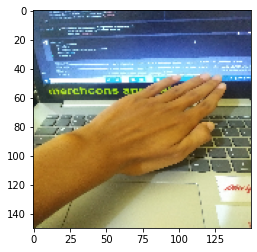

In [15]:
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')